In [95]:
!pip install google_play_scraper

In [96]:
from google_play_scraper import reviews, Sort
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
apps = {
    "Amazon": "com.amazon.mShop.android.shopping",
    "Shein": "com.zzkko",
    "AliExpress": "com.alibaba.aliexpresshd",
    "Noon": "com.noon.buyerapp",
    "Trendyol": "trendyol.com"
}


In [98]:
def label_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

In [99]:
all_reviews = []

for app_name, app_id in apps.items():
    print(f"Fetching reviews for {app_name}...")

    result, _ = reviews(
        app_id,
        lang="en",
        country="us",
        sort=Sort.NEWEST,
        count=3000
    )

    for r in result:
        all_reviews.append({
            "app_name": app_name,
            "review_text": r["content"],
            "rating": r["score"],
            "sentiment_label": label_sentiment(r["score"])
        })

Fetching reviews for Amazon...
Fetching reviews for Shein...
Fetching reviews for AliExpress...
Fetching reviews for Noon...
Fetching reviews for Trendyol...


In [100]:
df = pd.DataFrame(all_reviews)
df.head()


,app_name,review_text,rating,sentiment_label
0,Amazon,Dark patterns,1,Negative
1,Amazon,best,5,Positive
2,Amazon,"Works fine, still waiting for Dark Mode",4,Positive
3,Amazon,"Amazon's final straw, loyal customers insulted...",1,Negative
4,Amazon,"Half an hour on Amazon has been draining my 5,...",2,Negative


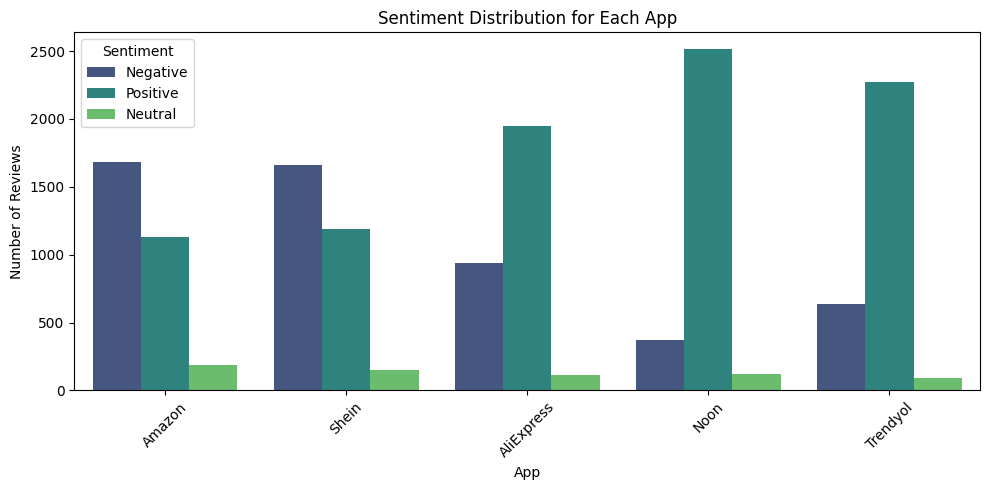

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

df_before = df.copy()
plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_before,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [102]:
df = df[df["review_text"].astype(str).str.contains(r"[A-Za-z]", na=False)].copy()
df["review_text"] = df["review_text"].astype(str)
df = df[df["review_text"].str.strip().ne("")].copy()

print("After language/empty filtering:", len(df))

After language/empty filtering: 14447


In [103]:
import re



def clean_text(text):

    text = re.sub(r"http\S+", "", str(text))

    text = re.sub(r"[^a-zA-Z\s]", "", text)

    text = text.lower()

    return text



df["clean_review"] = df["review_text"].apply(clean_text)

In [104]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [105]:
df[["review_text", "clean_review"]].head(10)

,review_text,clean_review
0,Dark patterns,dark patterns
1,best,best
2,"Works fine, still waiting for Dark Mode",works fine still waiting for dark mode
3,"Amazon's final straw, loyal customers insulted...",amazons final straw loyal customers insulted i...
4,"Half an hour on Amazon has been draining my 5,...",half an hour on amazon has been draining my mw...
5,tablet support hello? smh,tablet support hello smh
6,"Decent app, but no dark mode.",decent app but no dark mode
7,packages opened and products missing...Amazon ...,packages opened and products missingamazon is ...
8,at the beginning i receive my order in the exa...,at the beginning i receive my order in the exa...
10,maybe try fixing your retry payment options so...,maybe try fixing your retry payment options so...


In [106]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [107]:
df["Tokens"]= df["clean_review"].apply(word_tokenize)
df[[ "clean_review","Tokens"]].head(5)

,clean_review,Tokens
0,dark patterns,"[dark, patterns]"
1,best,[best]
2,works fine still waiting for dark mode,"[works, fine, still, waiting, for, dark, mode]"
3,amazons final straw loyal customers insulted i...,"[amazons, final, straw, loyal, customers, insu..."
4,half an hour on amazon has been draining my mw...,"[half, an, hour, on, amazon, has, been, draini..."


In [108]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

r
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df["Tokens_No_Stopwords"] = df["Tokens"].apply(remove_stopwords)


def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

df["Tokens_No_Stopwords_Lemmatized"] = df["Tokens_No_Stopwords"].apply(lemmatize_tokens)


df[["Tokens", "Tokens_No_Stopwords", "Tokens_No_Stopwords_Lemmatized"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Tokens,Tokens_No_Stopwords,Tokens_No_Stopwords_Lemmatized
0,"[dark, patterns]","[dark, patterns]","[dark, pattern]"
1,[best],[best],[best]
2,"[works, fine, still, waiting, for, dark, mode]","[works, fine, still, waiting, dark, mode]","[work, fine, still, waiting, dark, mode]"
3,"[amazons, final, straw, loyal, customers, insu...","[amazons, final, straw, loyal, customers, insu...","[amazon, final, straw, loyal, customer, insult..."
4,"[half, an, hour, on, amazon, has, been, draini...","[half, hour, amazon, draining, mwh, battery, t...","[half, hour, amazon, draining, mwh, battery, t..."


In [109]:
df['tokens_str'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ' '.join(x))
df = df.drop_duplicates(subset='tokens_str', keep='first')

In [110]:
df = df.drop(columns=['tokens_str'])

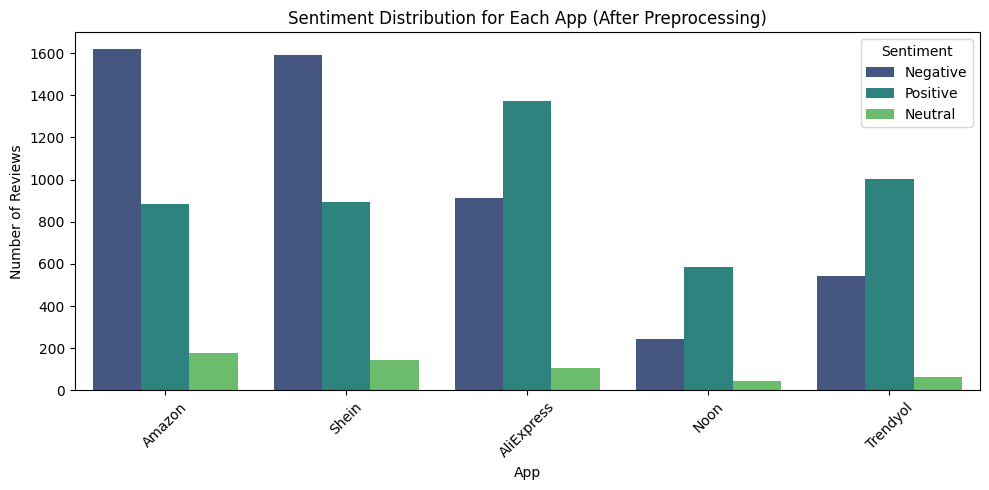

In [111]:
df_after = df.copy()

plt.figure(figsize=(10,5))

sns.countplot(
    x="app_name",
    hue="sentiment_label",
    data=df_after,
    palette="viridis"
)

plt.title("Sentiment Distribution for Each App (After Preprocessing)")
plt.xlabel("App")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

In [117]:
print("Before:\n", df_before["sentiment_label"].value_counts())
print("\nAfter:\n", df_after["sentiment_label"].value_counts())

Before:
 sentiment_label
Positive    9057
Negative    5283
Neutral      660
Name: count, dtype: int64

After:
 sentiment_label
Negative    4911
Positive    4739
Neutral      541
Name: count, dtype: int64


In [112]:
df.to_csv("google_play_app_reviews.csv", index=False)

In [113]:
from google.colab import files
files.download("google_play_app_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['final_text'] = df['Tokens_No_Stopwords_Lemmatized'].apply(lambda x: ''.join(x))
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['final_text'])
print(type(X))
y = df['sentiment_label']

<class 'scipy.sparse._csr.csr_matrix'>


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# BoW
bow_vectorizer = CountVectorizer(max_features=5000)

X_bow = bow_vectorizer.fit_transform(df["final_text"])
y = df["sentiment_label"]

# Split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    X_bow,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("BoW Shape:", X_bow.shape)

BoW Shape: (10191, 5000)
